In [128]:
import os
import settings
import pandas as pd
import numpy as np
import operator
import graphviz
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeRegressor

def read_data():
    df = pd.read_excel(os.path.join(settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")
    return df

def sort_important_features(df):
    dt = DecisionTreeRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = dt.fit(df[predictors], df[settings.TARGET])
    predictions = dt.predict(df[predictors])
    results = {name: score for name, score in zip(predictors, dt.feature_importances_)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = dt.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    return model

In [129]:
df = read_data()

In [130]:
model = sort_important_features(df)

feature: assent, importance: 0.04905976604822885
feature: i, importance: 0.03831030773074375
feature: drives, importance: 0.034304209480617374
feature: anx_4q, importance: 0.03171478877012937
feature: filler, importance: 0.031648118075381856
feature: home, importance: 0.030406351099416945
feature: feel, importance: 0.0276330230725416
feature: Sixltr, importance: 0.023562908412687125
feature: negemo_3q, importance: 0.01924940141860383
feature: tentat, importance: 0.01917149279247557
feature: insight, importance: 0.018900047452144877
feature: negate, importance: 0.018684358346200258
feature: affect_2q, importance: 0.018657547847253667
feature: leisure, importance: 0.01821709542871917
feature: health, importance: 0.01696283514988559
feature: achieve, importance: 0.016742813937574774
feature: posemo_2h, importance: 0.015979533271211818
feature: AuthorityVirtue, importance: 0.014630380033312565
feature: hear, importance: 0.014354907692834469
feature: family, importance: 0.014318666408868442

In [70]:
def print_tree(model):
    predictors = df.columns.tolist()
    features = [p for p in predictors if p not in settings.NON_PREDICTORS]
    data = export_graphviz(model, out_file=None, feature_names=features)
    graph = graphviz.Source(data)
    graph.render(view=True)

In [71]:
print_tree(model)

## Random Forest

In [131]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

def sort_important_features(df):
    rf = RandomForestRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = rf.fit(df[predictors], df[settings.TARGET])
    predictions = rf.predict(df[predictors])
    importances = rf.feature_importances_
    
    results = {name: score for name, score in zip(predictors, importances)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = rf.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    names = [k[0] for k in sorted_results]
    return model, importances, names

def plot_feature_importances(df, importances, names):
    reversed_names = names[::-1]
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    features = predictors
    indices = np.argsort(importances)
    predictors = np.array(predictors)
    
    
    plt.figure(figsize=(30,60))
    matplotlib.rcParams.update({'font.size': 22})
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')

    plt.yticks(range(len(indices)),reversed_names)
    plt.xlabel('Relative Importance')
    plt.show()

In [132]:
rf, importances, names = sort_important_features(df)

feature: assent, importance: 0.05666981833557738
feature: i, importance: 0.04466385538794983
feature: filler, importance: 0.03347482949982403
feature: ppron, importance: 0.027158366746509354
feature: tentat, importance: 0.022428249331829592
feature: negate, importance: 0.015196859688542477
feature: leisure, importance: 0.014652323688868023
feature: cogproc, importance: 0.014446836569503546
feature: affiliation, importance: 0.014278861497541725
feature: WPS, importance: 0.013994632687281789
feature: number, importance: 0.013445366777383491
feature: hear, importance: 0.012959091122278926
feature: insight, importance: 0.012387668382347663
feature: you, importance: 0.011934463515342743
feature: auxverb, importance: 0.011549721331392784
feature: achieve, importance: 0.011376346385726167
feature: netspeak, importance: 0.011172853177270865
feature: work, importance: 0.011026533651191966
feature: posemo, importance: 0.010788998351466988
feature: informal, importance: 0.010592910332999365
featu

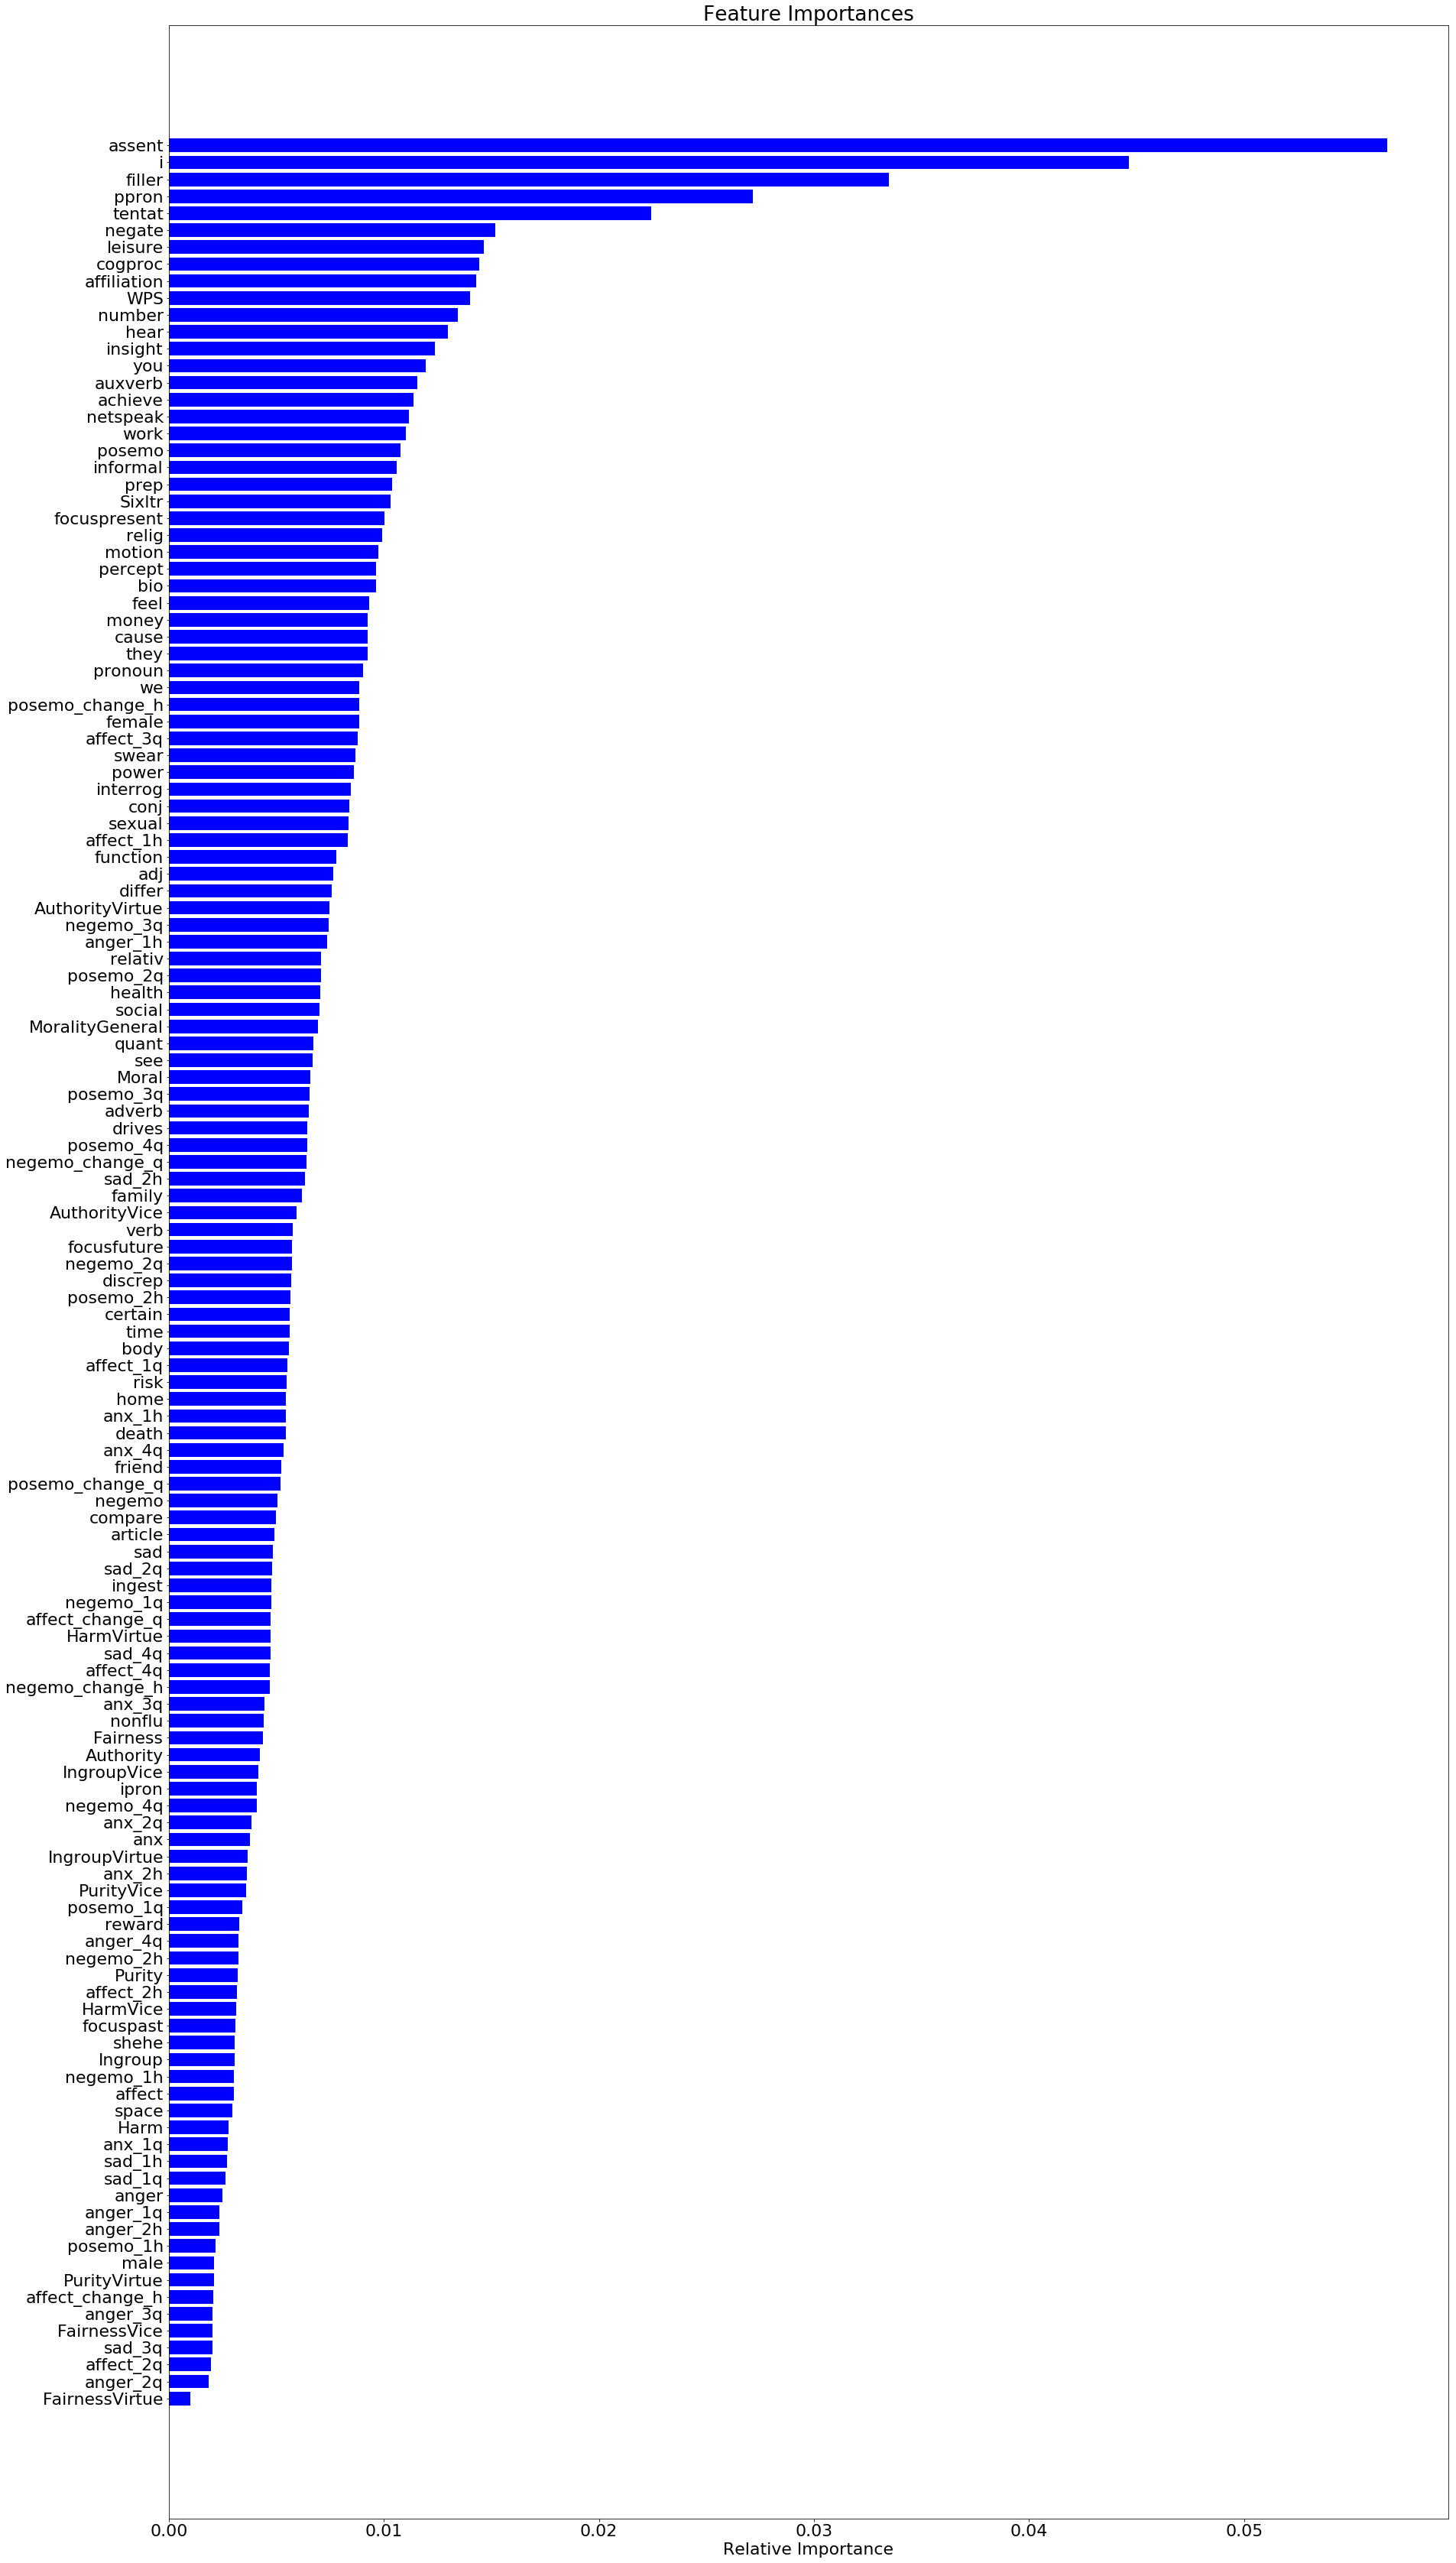

In [133]:
plot_feature_importances(df, importances, names)

## Linear Regression

In [66]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [134]:
def create_summary(df):
    lr = LinearRegression()
    predictors = df.columns.tolist()
    predictors = ['assent', 'i', 'insight', 'filler', 'Fairness', 'affect_change_h', 'negate', 'achieve','risk', 'posemo']
    lr.fit(df[predictors], df['applause'])

    X = df[predictors]
    X2 = sm.add_constant(X)
    est = sm.OLS(df['applause'], X2)
    est2 = est.fit()
    print(est2.summary())

In [135]:
create_summary(df)

                            OLS Regression Results                            
Dep. Variable:               applause   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     29.33
Date:                Sun, 14 Jan 2018   Prob (F-statistic):           1.06e-53
Time:                        22:09:10   Log-Likelihood:                -4835.7
No. Observations:                2406   AIC:                             9693.
Df Residuals:                    2395   BIC:                             9757.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.3483      0.159     

In [64]:
def create_summary(df):
    lr = LinearRegression()
    predictors = df.columns.tolist()
    predictors = ['affect_change_h']
    lr.fit(df[predictors], df['applause'])

    X = df[predictors]
    X2 = sm.add_constant(X)
    est = sm.OLS(df['applause'], X2)
    est2 = est.fit()
    print(est2.summary())

In [65]:
create_summary(df)

                            OLS Regression Results                            
Dep. Variable:               applause   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.876
Date:                Thu, 11 Jan 2018   Prob (F-statistic):             0.0273
Time:                        18:41:22   Log-Likelihood:                -4972.2
No. Observations:                2406   AIC:                             9948.
Df Residuals:                    2404   BIC:                             9960.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.0525      0.041     